<a href="https://colab.research.google.com/github/gulabpatel/NLP_Basics/blob/main/Part%200.2%3A%20Text_cleaning_Tourism_data_regex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# We first need to import dataset that we will use.
# The dataset is available on Github. If you run below codes, you can read the 
# dataset directly from Github without downloding it your local computer.
# Remember: You can upload up to 25MB files to GitHub

# Pandas is the library that makes reading a dataset easy. 
# We can start with importing Pandas

import pandas as pd
# Dataset will be stored in a Pandas Dataframe

url = 'https://raw.githubusercontent.com/DataScience-in-Tourism/Chapter-15-Introduction-Natural-Language-Processing/main/travelsomeday.csv'
df = pd.read_csv(url)

# Check the first column of the dataset
df.head(1)

,,,,,,,,,,,,,,,,,,,id,guid,link,pubdate,author,title,description,source,user_id,profile_image_url,user_statuses_count,user_friends_count,user_followers_count,user_created_at,user_bio,user_location,lang,coords,Unnamed: 18
1,https://twitter.com/_LoveCaribbean/statuses/1252926931634458624,https://twitter.com/_LoveCaribbean/statuses/1252926931634458624,2020-04-22 07:47:13,_LoveCaribbean,RT @grenadaexplorer: A tropical treasure to cherish forever 🌅 For exclusive #TravelTips and island insights visit https://t.co/wFawu512ad #…,A tropical treasure to cherish forever 🌅 For exclusive #TravelTips and island insights visit https://t.co/wFawu512ad #Grenada #TimeToLime #PureGrenada #SpiceIsle #ILoveGrenada #DreamTodayTravelTomorrow #TravelSomeDay #WeBelieveInTravel #GrenadaDreaming #CaribbeanDreaming https://t.co/64Kg2mPH3l,Twitter Web App,1356684936,https://pbs.twimg.com/profile_images/474150473876770817/aNbE9lsf_normal.jpeg,8047,1099,3019,2013-04-16 07:55:23,#CaribbeanDreaming The diversity of the Caribbean makes it a wonderful holiday destination whatever your tastes or interests.,London,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see from here, the text data is at the index. We need to convert indexes to columns.

In order to do this, first we need to give a name to columns in the index

In [ ]:
# Real data can be messy. In here, we don't have a column name. 
# Let's name the column
# For lazy naming, we will go with simple names with numbers. You can follow any
# naming method you prefer
df= df.rename_axis(['id1','url','url2','date','username', 'quote', 'tweet','as1','as2','as3','as4','as5','as6','as7','as8','as9','as10','as11','a12'])

# Check the name of the columns
df.columns.to_list()

['id',
 'guid',
 'link',
 'pubdate',
 'author',
 'title',
 'description',
 'source',
 'user_id',
 'profile_image_url',
 'user_statuses_count',
 'user_friends_count',
 'user_followers_count',
 'user_created_at',
 'user_bio',
 'user_location',
 'lang',
 'coords',
 'Unnamed: 18']

In [ ]:
# Check a random row to see whether your naming is in affect or not
df.sample(1)

,,,,,,,,,,,,,,,,,,,id,guid,link,pubdate,author,title,description,source,user_id,profile_image_url,user_statuses_count,user_friends_count,user_followers_count,user_created_at,user_bio,user_location,lang,coords,Unnamed: 18
id1,url,url2,date,username,quote,tweet,as1,as2,as3,as4,as5,as6,as7,as8,as9,as10,as11,a12,,,,,,,,,,,,,,,,,,,
420,https://twitter.com/TrulyMadly7/statuses/1251600725588746241,https://twitter.com/TrulyMadly7/statuses/1251600725588746241,2020-04-18 15:57:21,TrulyMadly7,RT @theCuriousPixie: Come and take an armchair tour of the Cotswolds in my NEW post @LovingBlogs @BloggerLS #TravelSomeDay https://t.co/4…,Come and take an armchair tour of the Cotswolds in my NEW post @LovingBlogs @BloggerLS #TravelSomeDay https://t.co/4BNHMpM9Ua https://t.co/BxQWIs9WKr,Twitter for iPhone,958849177,https://pbs.twimg.com/profile_images/3112148464/5bd987a8cfce2f358679502759e02d2a_normal.png,29070,1859,4017,2012-11-19 18:07:28,"Megan and Rosie in #tmk: Tooting, London and Skye. We travel, photograph, write and parent, in any order. Next trip: My home.","London, England",en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Sometimes we may get issue causing from indexing. In order to prevent it, reset index
df.reset_index(inplace=True)
# to save reseting index, you need to save it:
# df = df.reset_index(inplace=True)

# Check a random row
df.sample(1)

,id1,url,url2,date,username,quote,tweet,as1,as2,as3,as4,as5,as6,as7,as8,as9,as10,as11,a12,id,guid,link,pubdate,author,title,description,source,user_id,profile_image_url,user_statuses_count,user_friends_count,user_followers_count,user_created_at,user_bio,user_location,lang,coords,Unnamed: 18
5797,5798,https://twitter.com/clairesturz/statuses/12739...,https://twitter.com/clairesturz/statuses/12739...,2020-06-19 10:10:51,clairesturz,Mount Roraima: The Lost World of #Venezuela #t...,Mount Roraima: The Lost World of #Venezuela #t...,Revive Social App,874023301,https://pbs.twimg.com/profile_images/613107654...,42181,19532,24749,2012-10-11 13:32:59,Helping you plan your best future travel adven...,"England, United Kingdom",en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Checking random five tweets
df.tweet.sample(5).to_list()

["Bittersweet! After years of construction, #LaGuardiaAirport\\'s Terminal B is now open and it is STUNNING! But who will use it anytime soon? https://t.co/D0b3lB7kNm #TravelSomeday",
 'A #Yorkshire #Foodie Adventure: Finding the Best Food in Yorkshire #travelsomeday #armchairtravel #staythefhome https://t.co/vvCfeRQfyI',
 'Chios, Greece. #travelsomeday #home #agean https://t.co/O5H7XUBGYT',
 'Lucha Libre in #Mexico City – Your Guide to Mexican Wrestling! #travelsomeday #armchairtravel #plannowtravellater https://t.co/8tJq3coDbc',
 'The Best Things to Do in Mexico City #travelsomeday #armchairtravel #staythefhome https://t.co/qx4sOOMfoE #luchalibre']

In [ ]:
#We have two columns as a text. Let's check random 10 of them and decide which 
# one we will work on in the analysis process
df.loc[:,['quote', 'tweet']].sample(10)

,quote,tweet
64,RT @clairesturz: Semuc Champey #Tour in #Guate...,Semuc Champey #Tour in #Guatemala #travelsomed...
5883,Lake Atitlán #Guatemala – Your Ultimate Guide!...,Lake Atitlán #Guatemala – Your Ultimate Guide!...
5507,How to #Travel Around the #UK on a Budget #tra...,How to #Travel Around the #UK on a Budget #tra...
3177,I can’t wait to get out and explore my favouri...,I can’t wait to get out and explore my favouri...
1858,RT @RoarLoudTravel: A66 I want to go back to C...,"A66 I want to go back to California, it has be..."
807,Will #Europe keep its borders closed until Sep...,Will #Europe keep its borders closed until Sep...
1043,RT @always5star: Happy #EarthDay everyone! Her...,Happy #EarthDay everyone! Here are a few of my...
2634,RT @clairesturz: The Photo That Cost Me $500 #...,The Photo That Cost Me $500 #travelsomeday #ar...
183,"RT @clairesturz: If you love hostels, now is t...","If you love hostels, now is the time to #adopt..."
3827,RT @exec_tours: #TravelSomeDay Why play at Ata...,#TravelSomeDay Why play at Atalaya Golf? Two g...


It looks like quote column is mostly retweets. I will go with ***tweet*** column from now on, and apply text cleaning on it.

# **Text Cleaning**

In this step, these text cleaning steps will be applied on tweets:



*   Make all text lower case
*   Language Detection
*   Expanding Contractions
*   Removal of Stop Words
*   Removing URLs
*   Remove html HTML tags
*   Removing Emojis
*   Remove Emoticons
*   Stemming & Lemmatization (and the difference) and Tokenization
*   Spell Correction
*   Removing Punctuation
*   TF-IDF



In [ ]:
!pip install -q wordcloud
import wordcloud
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


# **Feature Extraction**

In [ ]:
# Here are the feature enginnering scripts that can be done before data cleaning

# Number of stopwords
stop = stopwords.words('english')
df['stopwords'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))

# Number of punctuation
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return count

df['punctuation'] = df['tweet'].apply(lambda x: count_punct(x))

# Number of hashtag characters
df['hastags'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))

# Number of numerics
df['numerics'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

# Number of Uppercase words
df['upper'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

# sentence count
df['sentence_count'] = df["tweet"].apply(lambda x: len(str(x).split(".")))


In [ ]:
# Checking first five tweets
df.head(5)

,id1,url,url2,date,username,quote,tweet,as1,as2,as3,as4,as5,as6,as7,as8,as9,as10,as11,a12,id,guid,link,pubdate,author,title,description,source,user_id,profile_image_url,user_statuses_count,user_friends_count,user_followers_count,user_created_at,user_bio,user_location,lang,coords,Unnamed: 18,stopwords,punctuation,hastags,numerics,upper,sentence_count
0,1,https://twitter.com/_LoveCaribbean/statuses/12...,https://twitter.com/_LoveCaribbean/statuses/12...,2020-04-22 07:47:13,_LoveCaribbean,RT @grenadaexplorer: A tropical treasure to ch...,A tropical treasure to cherish forever 🌅 For e...,Twitter Web App,1356684936,https://pbs.twimg.com/profile_images/474150473...,8047,1099,3019,2013-04-16 07:55:23,#CaribbeanDreaming The diversity of the Caribb...,London,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,21,11,0,1,3
1,2,https://twitter.com/carolcruising/statuses/125...,https://twitter.com/carolcruising/statuses/125...,2020-04-22 07:44:47,carolcruising,RT @clairesturz: Backpacking in #Cuba on a Bud...,Backpacking in #Cuba on a Budget #travelsomeda...,Twitter Web App,319114596,https://pbs.twimg.com/profile_images/630068953...,26683,660,1227,2011-06-17 11:47:16,Carol Colborn is the author of Carolina: Cruis...,"Phoenix, AZ",en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,9,4,0,0,2
2,3,https://twitter.com/Frommers/statuses/12529251...,https://twitter.com/Frommers/statuses/12529251...,2020-04-22 07:40:04,Frommers,We likeee! https://t.co/2g1HMCpsVn #DeltaAirl...,We likeee! https://t.co/2g1HMCpsVn #DeltaAirl...,Hootsuite Inc.,66244710,https://pbs.twimg.com/profile_images/463423099...,69152,32598,153703,2009-08-16 21:44:37,The Most Trusted Name In Travel since 1957.,Everywhere,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,9,3,0,0,2
3,4,https://twitter.com/clairesturz/statuses/12529...,https://twitter.com/clairesturz/statuses/12529...,2020-04-22 07:32:39,clairesturz,Experience Buenos Aires like a local #travelso...,Experience Buenos Aires like a local #travelso...,Revive Social App,874023301,https://pbs.twimg.com/profile_images/613107654...,39950,19520,24799,2012-10-11 13:32:59,Helping you plan your best future travel adven...,"England, United Kingdom",es,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,9,4,0,0,2
4,5,https://twitter.com/grenadaexplorer/statuses/1...,https://twitter.com/grenadaexplorer/statuses/1...,2020-04-22 07:32:02,grenadaexplorer,Who can\'t wait for Grenada Sailing Festival 2...,Who can\'t wait for Grenada Sailing Festival 2...,Buffer,17083471,https://pbs.twimg.com/profile_images/703782166...,4070,856,1882,2008-10-31 07:22:26,Travel & Island Guide for Grenada in the Carib...,Grenada,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,25,11,0,0,3


# Text Cleaning

### **Make all text lower case**

In [ ]:
# Apply lower casing step on all tweets
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Checking first five tweets
df['tweet'].head()

0    a tropical treasure to cherish forever 🌅 for e...
1    backpacking in #cuba on a budget #travelsomeda...
2    we likeee! https://t.co/2g1hmcpsvn #deltaairli...
3    experience buenos aires like a local #travelso...
4    who can\'t wait for grenada sailing festival 2...
Name: tweet, dtype: object

### **Language Detection**


In [ ]:
!pip install umap-learn
import os, re, nltk, spacy, string, umap


pd.set_option('display.max_colwidth', 50) 
nlp = spacy.load('en_core_web_sm')

!pip install spacy-langdetect
from spacy_langdetect import LanguageDetector
nlp.add_pipe(LanguageDetector(), name='language_detector', last=True)

     |████████████████████████████████| 81kB 4.0MB/s 
     |████████████████████████████████| 1.2MB 9.3MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=f8715ed35a9c139615b74678243ffa2dfec1067d83ecf53fd4126535e54da9e7
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51351 sha256=48355c28d1c1ad241f2b4bbbd8c2f52c918612dbbbc9aadb554e9209309e3f7d
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent
     |████████████████████████████████| 1.0MB 7.2MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.7-cp37-none-any.whl size=993460 sha256=a9ebbb185c9e0c57fdd5930050cafd0e3fcd37f5a71cc6952b987c9e4663fedc
  Stored in directory: /root/.cache/pip/wheels/ec/0c/a9/1647275e7ef5014e7b83ff30105180e332867d65e761

In [ ]:
def detect_language(tweet):
    try:
        doc = nlp(t)
        language = doc._.language['language']
        score = doc._.language['score']
    except:
        language = ''
        print('sth goes wrong')
    return language, score

languages = []
scores = []
for i, t in df['tweet'].iteritems():
    l, s = detect_language(t)
    if i % 500 ==0:   # depending on the size of your data, you can change this number
                      # This will print out every 500th tweets
        print(i, t, l)  
    languages.append(l)
    scores.append(s)
    
df['lng'] = languages
df['lng_score'] = scores

0 a tropical treasure to cherish forever 🌅 for exclusive #traveltips and island insights visit https://t.co/wfawu512ad #grenada #timetolime #puregrenada #spiceisle #ilovegrenada #dreamtodaytraveltomorrow #travelsomeday #webelieveintravel #grenadadreaming #caribbeandreaming https://t.co/64kg2mph3l en
500 sometimes sesha is draconine, othertimes he looks like this. 🇹🇭 @thailandinsider @thailandfanclub @gothaibefree #thailand #bangkok #watprakaew #ww #tt #ttot #travel #travelblogger #solotravel #gaytravel @ilovelgbttravel #travelfromhome #travelsomeday #armchairtravel #picoftheday https://t.co/llfjacahsf en
1000 happy #earthday everyone! here are a few of my favorite photos which celebrate the natural wonders of earth! share your favorite photos that celebrate this great planet! 🌟🌟🌟🌟🌟 #earthday2020 #wednesdaymorning #stayhome #travelsomeday #wednesdaymotivation https://t.co/wlczwhaqmm en
1500 the only #coronavirus change that we hope will stick around https://t.co/2g1hmcpsvn #travelsomeda

In [ ]:
# Create two new columns for storing language detection outputs.
df[['tweet', 'lng','lng_score']].sample(10).round(2)

,tweet,lng,lng_score
5441,"bittersweet! after years of construction, #lag...",en,1.0
4135,someday soon i’ll be back here again. #mexico ...,en,1.0
4461,the opportunity to see incredible creatures in...,en,1.0
802,will #europe keep its borders closed until sep...,en,1.0
1947,the best afternoon tea in #york #travelsomeday...,en,1.0
1387,when will we be able to travel again? &gt; htt...,en,1.0
3094,"#tikal national park, #guatemala “it is a stra...",en,1.0
1510,the best hostel in munich? wombat’s city hoste...,en,1.0
2250,@rickgriffin @always5star @_sundaysunsets_ @gr...,en,1.0
2099,"2019 seems like a lifetime ago, doesn\'t it? d...",en,1.0


In [ ]:
# Checking numbers of tweets for each languages
df.lng.value_counts()

en    5877
no      79
it      24
fr      13
es      11
da       7
ca       5
sv       5
sl       1
af       1
el       1
nl       1
hi       1
id       1
Name: lng, dtype: int64

In [ ]:
# Same table with above one just with dataframe format.
language_counts = df.lng.value_counts()
pd.DataFrame(language_counts)

,lng
en,5877
no,79
it,24
fr,13
es,11
da,7
ca,5
sv,5
sl,1
af,1


'no' stands for Norwegian language. 

For more info about acronyms of languages:
https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes

In [ ]:
# Number of English Tweets
df.loc[df.lng == 'en'].shape

(5877, 46)

In [ ]:
# Keep only English language and drop the rest
df = df.loc[df.lng == 'en']

### **Expand Contractions**

Contractions are words or combinations of words which are shortened by dropping letters and replacing them by an apostrophe. 

Let’s have a look at some examples:
* we’re = we are
* we’ve = we have
* I’d = I would

Note: This step needs to be done before word tokenizer because NLTK word tokenizer has in-built methods for dealing with contractions. However, NLTK word tokenizer's approach separates contractions without expanding. Expanding is a better method than simply separating.

In [ ]:
# Install contraction library 
!pip install contractions

     |████████████████████████████████| 286kB 5.3MB/s 
     |████████████████████████████████| 327kB 9.9MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85390 sha256=b86c82246cfb503a9e3d34668e252a84616a3954cb93670685d940dcac0a999d
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick


In [ ]:
import contractions

# Example text 
text = ''' She'll be airport in 30 mins. We are supposed to catch the arrival, aren't we?  
          I'd love to welcome her personally. It'll be an awesome vacation.'''
  
# creating an empty list 
expanded_words = []     
for word in text.split(): 
  # using contractions.fix to expand the shotened words 
  expanded_words.append(contractions.fix(word))    
    
expanded_text = ' '.join(expanded_words) 
print('Original text: ' + text) 
print('\n') 
print('Expanded_text: ' + expanded_text)

Original text:  She'll be airport in 30 mins. We are supposed to catch the arrival, aren't we?  
          I'd love to welcome her personally. It'll be an awesome vacation.


Expanded_text: she will be airport in 30 mins. We are supposed to catch the arrival, are not we? I would love to welcome her personally. it will be an awesome vacation.


In [ ]:
# Apply expanding contraction on tweet column
df['tweet'] = df['tweet'].apply(lambda x: contractions.fix(x))
df.tweet.sample(5)

4886    this interactive map shows at a glance the rul...
3866    11 tried &amp; tested tips for backpacking on ...
1503    i found these #wildflowers growing in an empty...
4453    is #barcelona safe? and how to avoid the barce...
2137    what to do in sigulda: a day trip from riga to...
Name: tweet, dtype: object

In [ ]:
# Checking first five tweets
df.tweet.head()

0    a tropical treasure to cherish forever 🌅 for e...
1    backpacking in #cuba on a budget #travelsomeda...
3    experience buenos aires like a local #travelso...
4    who can\'t wait for grenada sailing festival 2...
5    the best hostel in barcelona – fabrizzio’s pet...
Name: tweet, dtype: object

### **Removal of Stop Words** 

In [ ]:
# before removing stopwords, we can count count them.
# Remember that we already did this in the beginning. But it could be done here as well.

# Save numbers of stopwords as a new column. It may help us to use undertstand the data better
df['stopwords'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))

# Checking the tweets and their number of stopwords
df[['tweet','stopwords']].head()

,tweet,stopwords
0,a tropical treasure to cherish forever 🌅 for e...,4
1,backpacking in #cuba on a budget #travelsomeda...,3
3,experience buenos aires like a local #travelso...,1
4,who can\'t wait for grenada sailing festival 2...,3
5,the best hostel in barcelona – fabrizzio’s pet...,2


Removal of stopwords

In [ ]:
# import stopwords from NLTK library
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Remove stopwords from tweets
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Check random 10 tweets
df['tweet'].sample(10)

5594    bittersweet! years construction, #laguardiaair...
936     new post: back nature luxury stay fish hotel c...
5778    banff jasper itinerary - best places visit ban...
3998    kava anybody? fiji famous local kava ceremonie...
5240    best afternoon tea #york #travelsomeday #armch...
3574    know it\'s law wear high heels acropolis? rhod...
865     brick lane street art tour shoreditch #london ...
3204    el santuario de las lajas – #ipiales #travelso...
594     lying meadow #flowers chatham, ny. 🌼 #hudsonva...
2429    travel planning made easy: essential travel re...
Name: tweet, dtype: object

#### **Adding common words from our document to stop_words**

In [ ]:
add_words = ["also","im","ive",]

stop_words = set(stopwords.words("english"))
stop_added = stop_words.union(add_words)

# Re-running stopwords removal with additinal words
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_added))

# Checking random 10 tweets
df['tweet'].sample(10)

112     evolution bread... wow! life exciting moment.....
2633    experience buenos aires like local #travelsome...
395     virtually travel explore new zealand article g...
5249    last #cancun pic. razorous limestone lining tu...
5639    exploring catalunya: #adventure campdevánol wa...
1795    oops hashtags work added fact? #srilanka #trav...
5146    best things #guatemala #travelsomeday #armchai...
5859    japan amazing country can\'t wait go back. the...
2397    visit #prague winter #travelsomeday #armchairt...
465     visit #kansascity complete without stroll arti...
Name: tweet, dtype: object

### **Remove URLs** 

In [ ]:
import re

# define a function for removing URLs
def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

# Remove URLS with newly defined function
df['tweet'] = df.tweet.apply(remove_urls)

# Check first 5 tweets
df.tweet.head()

0    tropical treasure cherish forever 🌅 exclusive ...
1    backpacking #cuba budget #travelsomeday #armch...
3    experience buenos aires like local #travelsome...
4    can\'t wait grenada sailing festival 2021?! ☝️...
5    best hostel barcelona – fabrizzio’s petit revi...
Name: tweet, dtype: object

In [ ]:
# Example
sentence=  'NPR can provide useful information https://www.npr.org'
remove_urls(sentence)

'NPR can provide useful information '

### **Remove html tags** 

In [ ]:
from bs4 import BeautifulSoup

# Define a function for striping html tags
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

#Example
strip_html_tags('People and neighbors are for the most part very friendly,</a> even in stores</td>')

'People and neighbors are for the most part very friendly, even in stores'

In [ ]:
# Apply HTML tag removal on tweets
df['tweet'] = df['tweet'].apply(lambda x: strip_html_tags(x))

# Check first five tweets
df['tweet'].head()

0    tropical treasure cherish forever 🌅 exclusive ...
1    backpacking #cuba budget #travelsomeday #armch...
3    experience buenos aires like local #travelsome...
4    can\'t wait grenada sailing festival 2021?! ☝️...
5    best hostel barcelona – fabrizzio’s petit revi...
Name: tweet, dtype: object

###**Removing Emojis**

Eventhough emojis can be indictor of some emotions that can be related to the tweet, we need to remove the emojis in our text analysis because for now we don't have a strong method to utulize emojis.

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

#Example
remove_emoji("Have fun with NLP! 😃😃")

'Have fun with NLP! '

In [ ]:
# remove all emojis from tweets
df['tweet'] = df['tweet'].apply(lambda x: remove_emoji(x))

### **Remove Emoticons**

In previous steps, we have removed emoji. Now, going to remove emoticons.

What is the difference between emoji and emoticons?

:-) is an emoticon
😜 → emoji.

In [ ]:
!pip install emot
from emot.emo_unicode import UNICODE_EMO, EMOTICONS

# Function for removing emoticons
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

In [ ]:
#Example
remove_emoticons("I used to play Super Mario games :)")

'I used to play Super Mario games '

In [ ]:
# remove all emojis from tweets
df['tweet'] = df['tweet'].apply(lambda x: remove_emoticons(x))
# Check first five tweets
df.tweet.sample(5)

5125    things #evora #portugal #travelsomeday #armcha...
3282    hostel etiquette : stay hostel & piss #travels...
949     dance life #cancun.  @ilovelgbttravel @vivoenc...
5318    "soon come" say #grenada. visit  top #sailingt...
3686    #budapest street art & cultural walk #travelso...
Name: tweet, dtype: object

### **Stemming and Lemmatization**

**Definition**: Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes. Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma . 

Source: https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html



### **Tokenization**

During stemming or lemmatization process, tokenization will also be applied.

For many of the techniques we'll be using in future notebooks, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words.

There are different types of tokenization. For further info, you can check these articles:

> https://towardsdatascience.com/an-introduction-to-tweettokenizer-for-processing-tweets-9879389f8fe7

> https://towardsdatascience.com/benchmarking-python-nlp-tokenizers-3ac4735100c5





In [ ]:
#Example (adapted from datacamp)
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
porter=PorterStemmer()

In [ ]:
#Tourism specific words to be stemmed and lemmatized
word_list = ["tourist", "booking", "rating","itinerary","recreation","amenities","attractions","sightseeing","eating"]
print("{0:20}{1:20}{2:20}".format("Original Word","Stemmed","Lemmatized"))

for word in word_list:
    print("{0:20}{1:20}{2:20}".format(word,porter.stem(word),wordnet_lemmatizer.lemmatize(word,pos="v")))

Original Word       Stemmed             Lemmatized          
tourist             tourist             tourist             
booking             book                book                
rating              rate                rat                 
itinerary           itinerari           itinerary           
recreation          recreat             recreation          
amenities           amen                amenities           
attractions         attract             attractions         
sightseeing         sightse             sightsee            
eating              eat                 eat                 


In [ ]:
#We can apply just one of the stemming or lemmatizion. For this study, we will go with lemmatization.
#Still here is the codes for stemming in case you want to use stemming instead of lemmatization

# porter=PorterStemmer()

# def stemSentence(sentence):
#     token_words=word_tokenize(sentence)
#     token_words
#     stem_sentence=[]
#     for word in token_words:
#         stem_sentence.append(porter.stem(word))
#         stem_sentence.append(" ")
#     return "".join(stem_sentence)

# df['tweet'] = df['tweet'].apply(lambda x: stemSentence(x))
# df.sample(5)

'\nporter=PorterStemmer()\n\ndef stemSentence(sentence):\n    token_words=word_tokenize(sentence)\n    token_words\n    stem_sentence=[]\n    for word in token_words:\n        stem_sentence.append(porter.stem(word))\n        stem_sentence.append(" ")\n    return "".join(stem_sentence)\n\ndf[\'tweet\'] = df[\'tweet\'].apply(lambda x: stemSentence(x))\ndf.sample(5)\n'

In [ ]:
# Lemmatization and Tokenization

def LemmaSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    lemma_sentence=[]
    for word in token_words:
        lemma_sentence.append(wordnet_lemmatizer.lemmatize(word, pos= 'v'))
        lemma_sentence.append(" ")
    return "".join(lemma_sentence)

# Apply lemmatization function on tweet column
df['tweet'] = df['tweet'].apply(lambda x: LemmaSentence(x))

# Check first five tweets
df.tweet.sample(5)

1021    happy # earthday everyone ! favorite photos ce...
1275    see @ tpcdanzantebay fit landscape . ‍ @ villa...
1660    latest @ fodorstravel , hotels look like covid...
3203    break : european union release plan summer tra...
5600    castle sintra : fairytale palaces , garden his...
Name: tweet, dtype: object

### **Spell Correction** 
*Reminder: below explanation was taken from somewhere and needs to be parapharased*


We’ve all seen tweets with a plethora of spelling mistakes. Our timelines are often filled with hastly sent tweets that are barely legible at times.

In that regard, spelling correction is a useful pre-processing step because this also will help us in reducing multiple copies of words. For example, “Analytics” and “analytcs” will be treated as different words even if they are used in the same sense.

To achieve this we will use the textblob library.

In [ ]:
from textblob import TextBlob
#Example sentence
sentence = TextBlob("I havv goood speling!")
print(sentence.correct())

I have good spelling!


In [ ]:
# Example sentence related to tourism context
print(TextBlob('In Chicago, a lakeside is a goodf lcation to relax').correct())
print(TextBlob('Minesota is briming with natual and cltural bauty').correct()) 

In Chicago, a lakeside is a good location to relax
Minnesota is brimming with natural and cultural beauty


In [ ]:
df.shape

(5880, 46)

In [ ]:
# Apply spell correction on tweets. (This process can take a long)

# Running spell correction on first 10 tweets can give us an idea about how much it will take
# Our dataset has 5880 tweets right now. We can use consider the ratio for execution time
%time df['tweet'][:10].apply(lambda x: str(TextBlob(x).correct())) 

CPU times: user 43 s, sys: 83.1 ms, total: 43.1 s
Wall time: 43.2 s


0     tropical treasure cherish forever exclusive # ...
1     backpack # cuba budget # travelsomeday # armch...
3     experience burns air like local # travelsomeda...
4     can\'t wait grenade sail festival 2021 ? ! exc...
5     best hostel barcelona – fabrizzio ’ s petit re...
6     discover ancient history karay complex labor e...
7     discover ancient history karay complex labor e...
8     discover ancient history karay complex labor e...
9     get know big easy house , virtual tour , music...
10    discover ancient history karay complex labor e...
Name: tweet, dtype: object

In [ ]:
# Apply spell checking on all tweets

%time df['tweet'] = df['tweet'].apply(lambda x: str(TextBlob(x).correct())) 
# Note:if you are only playing with the dataset, you can you to skip this part because of long execution-time
# This part can take 6-7 hours depending on your computer

CPU times: user 4h 38min 25s, sys: 32.7 s, total: 4h 38min 58s
Wall time: 4h 39min 28s


In [ ]:
# Check first five tweets
df.tweet.head()

0    tropical treasure cherish forever exclusive # ...
1    backpack # cuba budget # travelsomeday # armch...
3    experience burns air like local # travelsomeda...
4    can\'t wait grenade sail festival 2021 ? ! exc...
5    best hostel barcelona – fabrizzio ’ s petit re...
Name: tweet, dtype: object

### **Removing Punctuation**

A reminder: if you remove punctuation earlier then html tags and URLs, then it won't be possible to remove them probably later. That's why, removing punctuation the last is a wise choice.

> Reminder: if your NLP algorithm can utulize punctuations such as VADER, you shouldn't remove punctuation.


In [ ]:
# Remove punctuation
df['tweet'] = df['tweet'].str.replace('[^\w\s]','')

# Check first five tweets
df['tweet'].head()

0    tropical treasure cherish forever exclusive  t...
1    backpack  cuba budget  travelsomeday  armchair...
3    experience buenos air like local  travelsomeda...
4    cant wait grenada sail festival 2021   exclusi...
5    best hostel barcelona  fabrizzio  s petit revi...
Name: tweet, dtype: object

In [ ]:
# Example
sentence = "Do you listen to music a lot?"
re.sub(r'[^\w\s]','',sentence)

'Do you listen to music a lot'

### **TF_IDF**


In [ ]:
#import the TfidfVectorizer from Scikit-Learn.
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=.80, min_df=5, stop_words=None, use_idf=True, norm=None)
transformed_tweets = vectorizer.fit_transform(df.tweet)

print(transformed_tweets.shape)

(5880, 1969)


In [ ]:
dense = transformed_tweets.todense()
denselist = dense.tolist()
feature_names = vectorizer.get_feature_names()
df2 = pd.DataFrame(denselist, columns=feature_names)

In [ ]:
df2.head()

,10,100,1000,11,12,13,14,15,16,17,176,180books,19,1partner,20,200,2019,2020,2021,2022,20second,21,24,25,27,2dancingpandas,2snowy,30,33,40,48,500,5step,80,_sundaysunsets_,aaatravel,abbey,abergavenny,abfabtravels,able,...,without,woman,women,wonder,wonderful,wont,woodland,work,workaway,worktrade,world,worldpackers,worst,worth,would,wouldnt,wreck,write,writer,writers,xeniakaepernick,xochimilco,xunantunich,year,yearly,years,yes,yet,york,yorkshire,yosemite,you,youk,your,yourcruisegurl,yourewelcome,yucatan,yuri,zealand,ziplining
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.040425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
transformed_tweets_as_array = transformed_tweets.toarray()
# use this line of code to verify that the numpy array represents the same number of documents that we have in the file list
len(transformed_tweets_as_array)

5880

### **Vectorizer**

Vectorier is a function for converting tokens into numerical columns. 

We can do this using scikit-learn's CountVectorizer, where every row will represent a different document and every column will represent a different word.



In [ ]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
data_cv = cv.fit_transform(df.tweet)

# Create document term matrix (dtm) by using count vectorizer
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = df.index
data_dtm

,02038725000,10,100,1000,1000s,1001,104,105,10day,11,12,125,13,137,14,15,16,1600s,17,1700mile,1700s,176,17miledrive,18,180books,1889,1890s,19,1900s,1992,1partner,20,200,2013,2016,2017,2018,2019,2020,2021,...,years,yellow,yellowsprings,yes,yet,york,yorkers,yorkshire,yosemite,yosemitenps,you,youk,young,youngadventures,your,yourcruisegurl,yourewelcome,yours,yous,youtubecommuni3,youtuber,yoyobob,yoyojohn,yt_twitchgrowth,yucatan,yukti77,yuri,zdeněk,zealand,zen,zinc,zionnps,ziplining,zone,zonetraveling,zwettl,zygoma,अरकवल,सof,ফর_আসবofমর_পডয
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6022,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6023,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6024,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6025,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Count vectorizer with different parameters
cv = CountVectorizer(max_df = 0.90, min_df= 0.001)
data_cv = cv.fit_transform(df.tweet)

# Create document term matrix (dtm) by using count vectorizer
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names()) #Document term matrix
data_dtm.index = df.index
data_dtm

,10,100,1000,11,12,14,15,17,180books,19,1partner,20,200,2019,2020,2021,20second,21,24,25,27,2dancingpandas,2snowy,30,33,48,500,5step,80,_sundaysunsets_,aaatravel,abbey,abergavenny,abfabtravels,able,abroad,abudhabi,acatenango,accommodation,accord,...,wildlifephotography,wildlifewednesday,will,wine,winetraveleats,winter,wish,with,without,woman,women,wonder,wonderful,wont,work,workaway,world,worldpackers,worst,worth,would,wouldnt,wreck,write,writer,xeniakaepernick,xunantunich,year,years,yes,york,yorkshire,yosemite,you,your,yourcruisegurl,yourewelcome,yucatan,zealand,ziplining
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6022,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6023,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6024,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6025,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Let's pickle it for later use
data_dtm.to_pickle("cleaned_tweets.pkl")

#Notice that the pickled data contains only tweets, not other columns.


**What Can You Do With pickle?**

Pickling is useful for applications where you need some degree of persistency in your data. 
Your program's state data can be saved to disk, so you can continue working on it later on.
It can also be used to send data over a Transmission Control Protocol (TCP) or 
socket connection, or to store python objects in a database. Pickle is very 
useful for when you're working with machine learning algorithms, where you want
to save them to be able to make new predictions at a later time, without
having to rewrite everything or train the model all over again.

Source:https://www.datacamp.com/community/tutorials/pickle-python-tutorial#whatfor




---
# **FEATURE EXTRACTION**

For the feature extraction, we will apply following steps in order. Depending on your study and data, you may skip some of these features and add your own feature extractions.

 word count: counts the number of tokens in the text (separated by a space)

1.   **character count**: 
2. **average word length**


Features that can only be obtained before the text cleaning


* Number of stop words
* The number of punctuation
* Number of hashtag characters
* Number of numerical characters
* Number of Uppercase words
* sentence count

In [ ]:
#Let's save cleaned data
df.to_csv('tourism_tweets_cleaned.csv', index=False)

# **Word Cloud**


In [ ]:
#Word cloud for the all reviews
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text_for_cloud = " ".join(x for x in df.tweet)
print ("There are {} words in the combination of all tweets.".format(len(text_for_cloud)))

There are 719175 words in the combination of all tweets.


In [ ]:
# Check first five tweets
df.tweet.head()

0    tropical treasure cherish forever exclusive  t...
1    backpack  cuba budget  travelsomeday  armchair...
3    experience buenos air like local  travelsomeda...
4    cant wait grenada sail festival 2021   exclusi...
5    best hostel barcelona  fabrizzio  s petit revi...
Name: tweet, dtype: object

In [ ]:
#Libraries for visualization
from nltk.corpus import stopwords
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# During text cleaning process, data type can change at somepoint.
# Make sure that your reviews are in string data format.
df['tweet']= df['tweet'].astype(str)

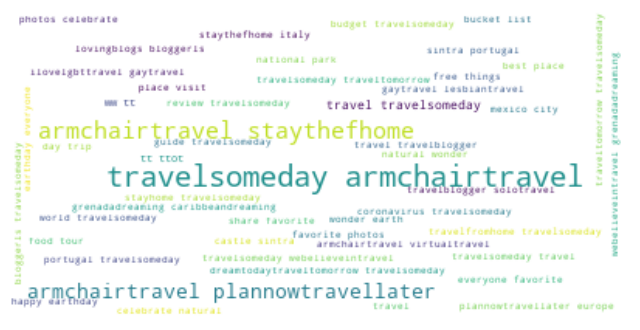

In [ ]:
# Create stopword list:
#stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"]) # you can add new stopwords by modifying this column

# Generate a word cloud image
stop_words = set(stopwords.words("english"))
wordcloud = WordCloud(stopwords=stop_words, background_color="white", max_words= 50).generate(text_for_cloud)

# Display the generated image:
# the matplotlib way:
fig = plt.figure(figsize= (8,8), dpi= 100)
# figure(figsize= (8,8), dpi= 200)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

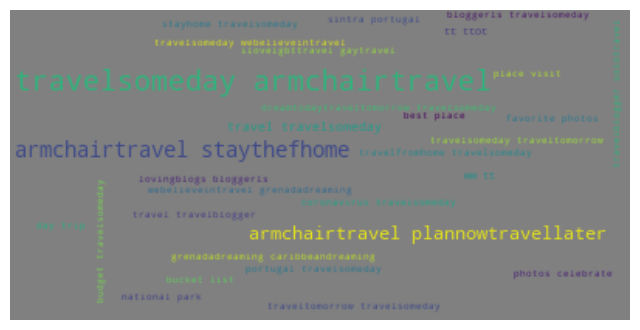

In [ ]:
# Create stopword list:
#stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"]) # you can add new stopwords by modifying this column

# Generate a word cloud image
stop_words = set(stopwords.words("english"))
wordcloud = WordCloud(stopwords=stop_words, background_color="gray", max_words= 30).generate(text_for_cloud)

# Display the generated image:
# the matplotlib way:
fig = plt.figure(figsize= (8,8), dpi= 100)
# figure(figsize= (8,8), dpi= 200)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

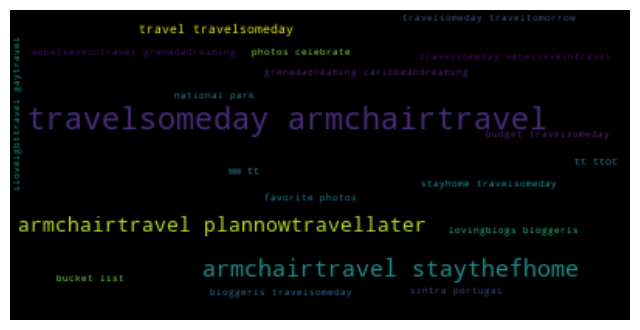

In [ ]:
# Create stopword list:
#stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"]) # you can add new stopwords by modifying this column

# Generate a word cloud image
stop_words = set(stopwords.words("english"))
wordcloud = WordCloud(stopwords=stop_words, background_color="black", max_words= 20).generate(text_for_cloud)

# Display the generated image:
# the matplotlib way:
fig = plt.figure(figsize= (8,8), dpi= 100)
# figure(figsize= (8,8), dpi= 200)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Check frequency of the most common words**

In [ ]:
# Frequency of the most common 20 words
freq = pd.Series(' '.join(df['tweet']).split()).value_counts()[:20]
freq

travelsomeday         5880
armchairtravel        3203
travel                1917
staythefhome          1532
plannowtravellater    1217
s                      662
visit                  606
best                   583
trip                   377
world                  371
things                 368
tour                   358
get                    309
day                    283
traveltomorrow         281
plan                   267
time                   259
ttot                   251
new                    250
gaytravel              243
dtype: int64

### **Checking requirements for this notebook**

In [ ]:
# Save list of required libraries and packages for this notebook
!pip3 freeze > requirements.txt

In [ ]:
# show the file's contents
! cat requirements.txt

In [ ]:
# Import the os module
import os

# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Print the type of the returned object
print("os.getcwd() returns an object of type: {0}".format(type(cwd)))

Current working directory: /content
os.getcwd() returns an object of type: <class 'str'>
